In [ ]:
# Imports
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Downloading datasets
file_id1= '1HAAdP4rtI2EkJS_867XHMajXxY6z0sRU'
file_id2 = '1w_4xTCDYcY-lu3p1zB3pT2EjM7CuXIaa'
url1 = f'https://drive.google.com/uc?id={file_id1}'
url2 = f'https://drive.google.com/uc?id={file_id2}'
df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)

# Question 1

## A

In [ ]:
X = df1.drop(columns=['Outcome'])
y = df1['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Train a Decision Tree
clf = DecisionTreeClassifier(random_state=40)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print('Decision Tree Report:')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.75
Precision: 0.74
Recall: 0.75


## B

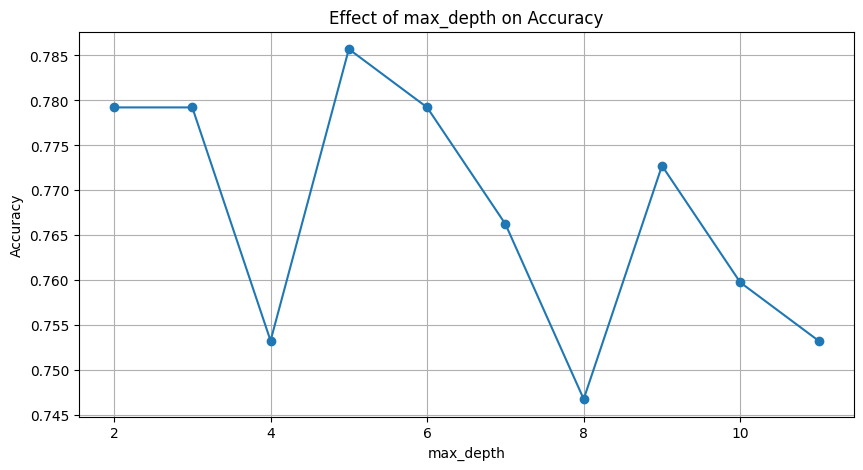

Best max_depth: 5
Best Accuracy: 0.79



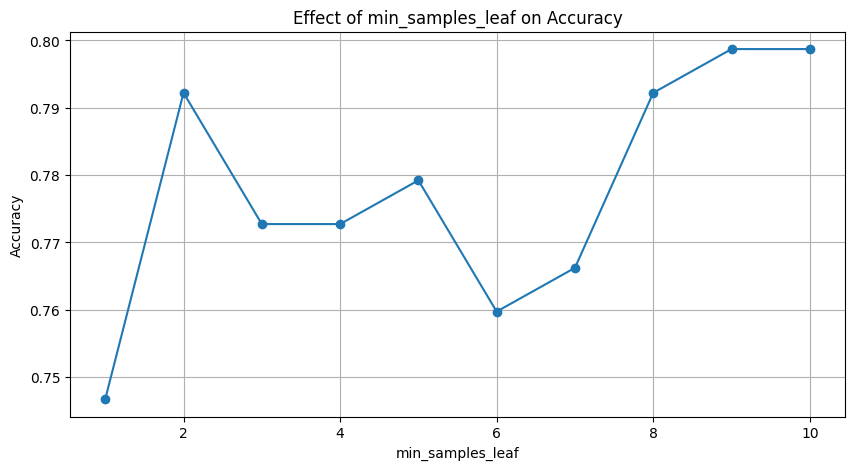

Best min_samples_leaf: 9
Best Accuracy: 0.80


In [ ]:
max_depths = range(2, 12)  # Testing depths from 2 to 11
accuracies = []

for max_depth in max_depths:
    # Train the Decision Tree with varying max_depth
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=40)
    clf.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.figure(figsize=(10, 5))
plt.plot(max_depths, accuracies, marker='o', label='Accuracy')
plt.title('Effect of max_depth on Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

best_index = accuracies.index(max(accuracies))
print(f'Best max_depth: {max_depths[best_index]}')
print(f'Best Accuracy: {accuracies[best_index]:.2f}', end='\n\n')

min_samples_leafs = range(1, 11)  # Testing values from 1 to 10
accuracies = []

for min_samples_leaf in min_samples_leafs:
    # Train the Decision Tree with min_samples_leaf
    clf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=40)
    clf.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.figure(figsize=(10, 5))
plt.plot(min_samples_leafs, accuracies, marker='o', label='Accuracy')
plt.title('Effect of min_samples_leaf on Accuracy')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

best_index = accuracies.index(max(accuracies))
print(f'Best min_samples_leaf: {min_samples_leafs[best_index]}')
print(f'Best Accuracy: {accuracies[best_index]:.2f}')

## C

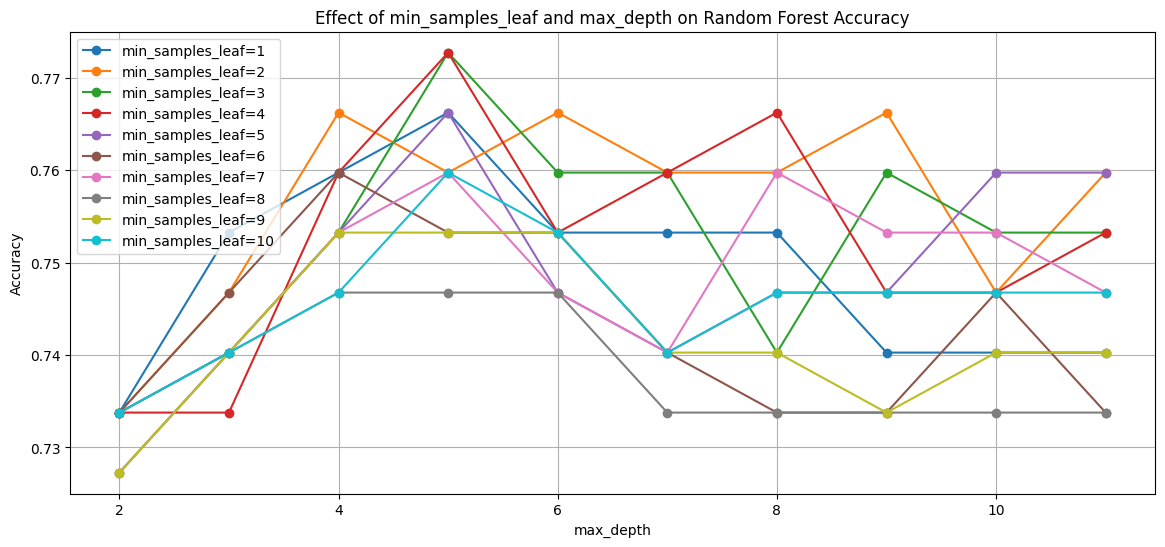

Best min_samples_leaf: 3
Best max_depth: 5
Best Accuracy: 0.77


In [ ]:
min_samples_leaf_values = range(1, 11) # Testing values from 1 to 10
max_depth_values = range(2, 12) # Testing depths from 2 to 11
results = []

# Loop through each combination of min_samples_leaf and max_depth
for min_samples_leaf in min_samples_leaf_values:
    for max_depth in max_depth_values:
        # Train the RandomForest model
        rf_clf = RandomForestClassifier(
            n_estimators=100,
            min_samples_leaf=min_samples_leaf,
            max_depth=max_depth,
            random_state=42
        )
        rf_clf.fit(X_train, y_train)

        # Predict and calculate accuracy
        y_pred_rf = rf_clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred_rf)
        results.append((min_samples_leaf, max_depth, acc))

# Convert results to a plot-friendly format
results_sorted = sorted(results, key=lambda x: x[2], reverse=True)

plt.figure(figsize=(14, 6))
for min_samples_leaf in min_samples_leaf_values:
    accuracies = [res[2] for res in results if res[0] == min_samples_leaf]
    plt.plot(max_depth_values, accuracies, marker='o', label=f'min_samples_leaf={min_samples_leaf}')

plt.title('Effect of min_samples_leaf and max_depth on Random Forest Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

best_result = results_sorted[0]
print(f'Best min_samples_leaf: {best_result[0]}')
print(f'Best max_depth: {best_result[1]}')
print(f'Best Accuracy: {best_result[2]:.2f}')


# Question 2

## A

In [ ]:
# Using mean to fill nan values
def mean_imputer(df):
    df_imputed = df.copy()
    # Loop over each column in the DataFrame
    for column in df_imputed.columns:
        # Calculate the mean of the column, ignoring NaN values
        mean_value = df_imputed[column].mean()

        # Replace NaN values with the mean
        df_imputed[column].fillna(mean_value, inplace=True)

    return df_imputed

In [ ]:
# One hot encoding
df_one_hot_encoded = pd.get_dummies(df2, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# Remove ID
df_one_hot_encoded = df_one_hot_encoded.drop(columns=['id'])

# Convert bools to int
df_final = df_one_hot_encoded.astype({col: 'int' for col in df_one_hot_encoded.select_dtypes('bool').columns})

# Apply mean imputation to the DataFrame
df_final = mean_imputer(df_final)
df_final

<ipython-input-168-16f447f6c6e9>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed[column].fillna(mean_value, inplace=True)


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,3.0,0,0,95.12,18.0,0,0,1,0,1,...,0,0,0,0,1,1,0,0,0,0
1,58.0,1,0,87.96,39.2,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,8.0,0,0,110.89,17.6,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3,70.0,0,0,69.04,35.9,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,14.0,0,0,161.28,19.1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,10.0,0,0,58.64,20.4,0,1,0,0,1,...,0,0,0,0,1,0,1,0,1,0
43396,56.0,0,0,213.61,55.4,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
43397,82.0,1,0,91.94,28.9,0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
43398,40.0,0,0,99.16,33.2,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0


In [ ]:
imputer = IterativeImputer(estimator=RandomForestRegressor())
df_imputed = imputer.fit_transform(df_one_hot_encoded)
df_final = pd.DataFrame(df_imputed, columns=df_one_hot_encoded.columns)

## B

In [ ]:
# Separate majority and minority classes
majority_class = df_final[df_final['stroke'] == 0]
minority_class = df_final[df_final['stroke'] == 1]

# Undersample the majority class to match the minority class size
majority_class_downsampled = resample(
    majority_class,
    replace=False,  # sample without replacement
    n_samples=len(minority_class),  # match minority class size
    random_state=40
)

# Combine the downsampled majority class with the minority class
balanced_df = pd.concat([majority_class_downsampled, minority_class])

balanced_df = balanced_df.dropna()
# Separate features and labels
X = balanced_df.drop(columns=['stroke'])
y = balanced_df['stroke']

# Split the balanced dataset into train and test sets symmetrically
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=40)

# Display the class distribution in both train and test sets
print("Class distribution in training set:\n", y_train.value_counts())
print("Class distribution in test set:\n", y_test.value_counts())

Class distribution in training set:
 stroke
1    626
0    626
Name: count, dtype: int64
Class distribution in test set:
 stroke
0    157
1    157
Name: count, dtype: int64


## C

In [ ]:
def manhattan_distance(point1, point2):
    return sum(abs(a - b) for a, b in zip(point1, point2))

def min_max_normalize(df):
    normalized_df = df.copy()
    for column in normalized_df.columns:
        min_val = normalized_df[column].min()
        max_val = normalized_df[column].max()

        if min_val == max_val:
            normalized_df[column] = 0
        else:
            normalized_df[column] = (normalized_df[column] - min_val) / (max_val - min_val)

    return normalized_df

def standardize(df):
    standardized_df = df.copy()
    for column in standardized_df.columns:
        mean_val = standardized_df[column].mean()
        std_val = standardized_df[column].std()
        if std_val != 0:
            standardized_df[column] = (standardized_df[column] - mean_val) / std_val
        else:
            standardized_df[column] = 0
    return standardized_df

def my_knn(X_train, y_train, X_test, k=3):
    predictions = []
    for test_point in X_test.to_numpy():
        # Calculate distances from the test point to all training points
        distances = []
        for i, train_point in enumerate(X_train.to_numpy()):
            distance = manhattan_distance(test_point, train_point)
            distances.append((distance, y_train.iloc[i]))

        # Sort by distance and get the labels of the k nearest neighbors
        distances = sorted(distances, key=lambda x: x[0])
        k_nearest_labels = [label for _, label in distances[:k]]

        # Get the most common label among the k nearest neighbors
        most_common = Counter(k_nearest_labels).most_common(1)
        predictions.append(most_common[0][0])

    return predictions

In [ ]:
k = 21

# Standardize the DataFrame
X_train_normalized = standardize(X_train)
X_test_normalized = standardize(X_test)

# Predict on the test set
y_pred = my_knn(X_train_normalized, y_train, X_test_normalized, k=k)

print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       157
           1       0.72      0.79      0.75       157

    accuracy                           0.74       314
   macro avg       0.74      0.74      0.74       314
weighted avg       0.74      0.74      0.74       314



## D

In [ ]:
# Define imputers and scalers
imputers = {
    'Mean': SimpleImputer(strategy='mean'),
    'Median': SimpleImputer(strategy='median'),
    'Mode': SimpleImputer(strategy='most_frequent'),
    'KNN': KNNImputer(n_neighbors=5),
    'Iterative': IterativeImputer(),
    'RandomForestRegressor': IterativeImputer(estimator=RandomForestRegressor(), max_iter=10, random_state=40)
}
scalers = {
    'Standardization': StandardScaler(),
    'Normalization': MinMaxScaler(),
}
results = []

# Loop through each imputer and scaler
for imputer_name, imputer in imputers.items():
    # Impute missing values on training and test sets
    X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
    X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

    for scaler_name, scaler in scalers.items():
        # Scale the imputed data
        X_train_scaled = scaler.fit_transform(X_train_imputed)
        X_test_scaled = scaler.transform(X_test_imputed)
        knn = KNeighborsClassifier(n_neighbors=7, metric='manhattan')
        knn.fit(X_train_scaled, y_train)
        accuracy = knn.score(X_test_scaled, y_test)

        results.append({
            'Imputation': imputer_name,
            'Scaling': scaler_name,
            'Accuracy': accuracy
        })

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)

print("Comparison of KNNs with different preprocessing methods:")
print(results_df.sort_values(by='Accuracy', ascending=False))

Comparison of KNNs with different preprocessing methods:
               Imputation          Scaling  Accuracy
0                    Mean  Standardization  0.726115
2                  Median  Standardization  0.726115
4                    Mode  Standardization  0.726115
6                     KNN  Standardization  0.726115
8               Iterative  Standardization  0.726115
10  RandomForestRegressor  Standardization  0.726115
1                    Mean    Normalization  0.719745
3                  Median    Normalization  0.719745
5                    Mode    Normalization  0.719745
7                     KNN    Normalization  0.719745
9               Iterative    Normalization  0.719745
11  RandomForestRegressor    Normalization  0.719745


## E

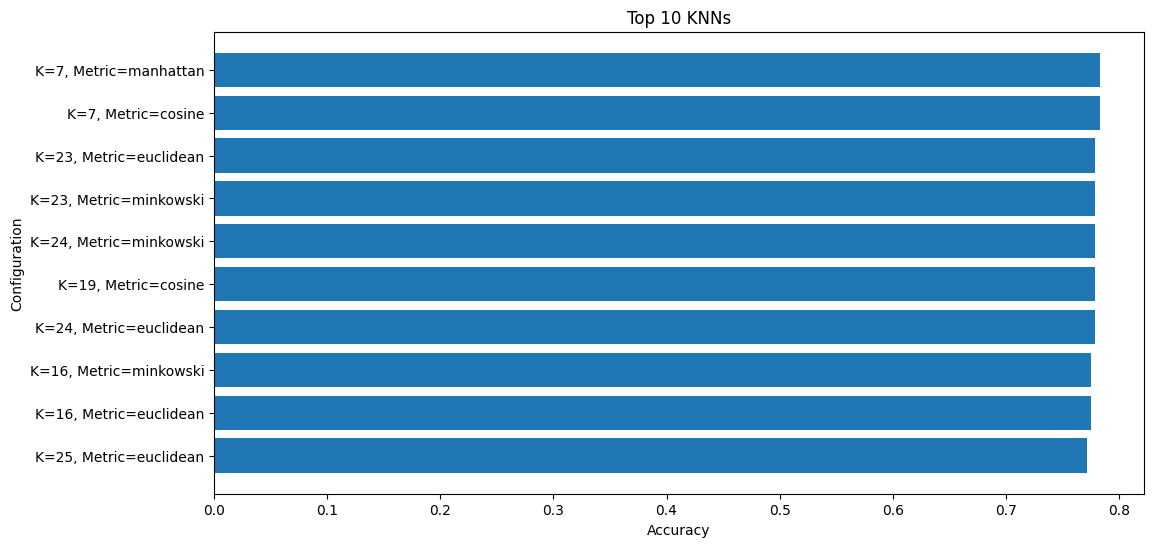

Most Accurate KNN:
K: 7
Distance Metric: manhattan
Accuracy: 78.29%


In [ ]:
# Different K and distances
k_values = range(3, 30)
distance_metrics = ['euclidean', 'manhattan', 'minkowski', 'cosine']
results = []

# Normalize
X_train_normalized = min_max_normalize(X_train)
X_test_normalized = min_max_normalize(X_test)

scaler = StandardScaler()

# Fit the scaler on the DataFrame and transform it
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


# Iterate over different values of K and distance metrics
for metric in distance_metrics:
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        results.append({
            'k': k,
            'metric': metric,
            'accuracy': accuracy
        })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Sort the results DataFrame to get the top 10 configurations by accuracy
top_results_df = results_df.sort_values(by='accuracy', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_results_df.apply(lambda row: f"K={row['k']}, Metric={row['metric']}", axis=1), top_results_df['accuracy'])
plt.xlabel('Accuracy')
plt.ylabel('Configuration')
plt.title('Top 10 KNNs')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest accuracy on top
plt.show()

best_knn = top_results_df.iloc[0]
print('Most Accurate KNN:')
print(f'K: {best_knn["k"]}')
print(f'Distance Metric: {best_knn["metric"]}')
print(f'Accuracy: {best_knn["accuracy"] * 100:.2f}%')